# Trip Assignment Analysis - Node-Level Overview

This notebook analyzes the trip assignment data from the last episode of the multi-agent ride-hailing simulation.
We'll examine how passengers are assigned to each agent based on prices, utilities, and probabilities for each origin node.

## 1. Import Required Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully")

Libraries imported successfully


## 2. Load Episode Data

In [13]:
# Configuration - UPDATE THESE VALUES BASED ON YOUR EXPERIMENT
city = 'san_francisco'  # Change this to your city
mode = 2  # Change this to your mode (0, 1, or 2)
fix_agent = 2  # Change this to your fix_agent setting (0, 1, or 2)

# Construct file path
data_dir = Path('saved_files/trip_data')

# Try to load experiment data first, fall back to test data
filename = f'trip_assignments_{city}_mode{mode}_fixagent{fix_agent}_last_episode.csv'
filepath = data_dir / filename

if not filepath.exists():
    print(f"Experiment data not found: {filepath}")
    print("Using test data instead...")
    filepath = data_dir / 'test_trip_assignments.csv'

# Load data
if filepath.exists():
    df = pd.read_csv(filepath)
    print(f"✓ Loaded {len(df)} trip records from {filepath.name}")
    print(f"\nDataset shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
else:
    print(f"❌ File not found: {filepath}")
    print("Please run the training script with --test flag to generate trip data")
    df = None

✓ Loaded 348 trip records from trip_assignments_san_francisco_mode2_fixagent2_last_episode.csv

Dataset shape: (348, 16)
Columns: ['time', 'origin', 'destination', 'travel_time', 'price_agent0', 'price_agent1', 'utility_agent0', 'utility_agent1', 'utility_reject', 'prob_agent0', 'prob_agent1', 'prob_reject', 'demand_agent0', 'demand_agent1', 'demand_rejected', 'total_demand']


## 3. Data Overview

In [14]:
# Display first few rows
print("First 10 rows of trip data:")
display(df.head(10))

# Basic statistics
print("\nBasic statistics:")
display(df.describe())

First 10 rows of trip data:


,time,origin,destination,travel_time,price_agent0,price_agent1,utility_agent0,utility_agent1,utility_reject,prob_agent0,prob_agent1,prob_reject,demand_agent0,demand_agent1,demand_rejected,total_demand
0,0,2,1,3,16.0,16.0,-3.387500,-3.387500,0,3.165370e-02,3.165370e-02,0.936693,0,0,1,1
1,0,4,7,4,19.9,19.9,-7.583333,-7.583333,0,5.083448e-04,5.083448e-04,0.998983,0,0,2,2
2,0,4,8,5,28.9,28.9,-16.879167,-16.879167,0,4.671658e-08,4.671658e-08,1.000000,0,0,1,1
3,0,5,8,3,11.8,11.8,0.812500,0.812500,0,4.092076e-01,4.092076e-01,0.181585,5,1,0,6
4,0,5,9,6,24.2,24.2,-12.475000,-12.475000,0,3.820965e-06,3.820965e-06,0.999992,0,0,1,1
5,0,7,0,6,28.4,28.4,-16.675000,-16.675000,0,5.729800e-08,5.729800e-08,1.000000,0,0,2,2
6,0,7,2,6,31.6,31.6,-19.875000,-19.875000,0,2.335593e-09,2.335593e-09,1.000000,0,0,1,1
7,0,7,8,4,14.3,14.3,-1.983333,-1.983333,0,1.079107e-01,1.079107e-01,0.784179,1,2,3,6
8,0,7,9,5,21.6,21.6,-9.579167,-9.579167,0,6.914499e-05,6.914499e-05,0.999862,0,0,1,1
9,0,8,3,6,31.0,31.0,-19.275000,-19.275000,0,4.255728e-09,4.255728e-09,1.000000,0,0,1,1



Basic statistics:


,time,origin,destination,travel_time,price_agent0,price_agent1,utility_agent0,utility_agent1,utility_reject,prob_agent0,prob_agent1,prob_reject,demand_agent0,demand_agent1,demand_rejected,total_demand
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.0,3.480000e+02,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000
mean,9.477011,6.781609,6.278736,4.373563,11.268800,12.887223,0.937355,-0.681069,0.0,5.508630e-01,1.840594e-01,0.265078,2.037356,1.008621,0.666667,3.712644
std,5.764048,1.837335,2.156662,2.270876,7.128851,6.709474,7.702839,7.330970,0.0,3.479269e-01,2.075068e-01,0.379729,2.463868,1.936286,1.401248,3.678454
min,0.000000,1.000000,0.000000,1.000000,3.043380,5.929905,-43.528294,-41.185370,0.0,1.247102e-19,1.298438e-18,0.000037,0.000000,0.000000,0.000000,1.000000
25%,5.000000,5.000000,5.000000,3.000000,7.145545,9.052167,0.265394,-2.491962,0.0,2.917259e-01,1.218165e-02,0.003656,0.000000,0.000000,0.000000,1.000000
50%,9.000000,7.000000,7.000000,4.000000,9.822250,10.502792,2.597806,1.959563,0.0,6.016684e-01,9.065164e-02,0.037081,1.000000,0.000000,0.000000,2.000000
75%,15.000000,8.000000,8.000000,5.000000,11.945379,14.340111,5.355640,3.449834,0.0,8.809292e-01,3.032429e-01,0.418198,3.000000,1.000000,1.000000,5.000000
max,19.000000,9.000000,9.000000,18.000000,51.703294,49.360370,10.160786,7.274262,0.0,9.882892e-01,8.084738e-01,1.000000,14.000000,12.000000,12.000000,24.000000


## 4. Node-Level Analysis

Aggregate data by origin node to understand demand patterns and agent assignments.

In [16]:
# Group by origin node and aggregate metrics
node_summary = df.groupby('origin').agg({
    'total_demand': 'sum',
    'demand_agent0': 'sum',
    'demand_agent1': 'sum',
    'demand_rejected': 'sum',
    'price_agent0': 'mean',
    'price_agent1': 'mean',
    'travel_time': 'mean',
    'utility_agent0': 'mean',
    'utility_agent1': 'mean',
    'utility_reject': 'mean',
    'prob_agent0': 'mean',
    'prob_agent1': 'mean',
    'prob_reject': 'mean'
}).reset_index()

# Calculate additional metrics
node_summary['agent0_share'] = node_summary['demand_agent0'] / node_summary['total_demand']
node_summary['agent1_share'] = node_summary['demand_agent1'] / node_summary['total_demand']
node_summary['rejection_rate'] = node_summary['demand_rejected'] / node_summary['total_demand']
node_summary['price_difference'] = node_summary['price_agent0'] - node_summary['price_agent1']

# Sort by total demand
node_summary = node_summary.sort_values('total_demand', ascending=False)

print(f"\nNode-level summary for {len(node_summary)} origin nodes:")
display(node_summary)


Node-level summary for 9 origin nodes:


,origin,total_demand,demand_agent0,demand_agent1,demand_rejected,price_agent0,price_agent1,travel_time,utility_agent0,utility_agent1,utility_reject,prob_agent0,prob_agent1,prob_reject,agent0_share,agent1_share,rejection_rate,price_difference
7,8,618,252,247,119,13.953053,13.751218,4.333333,-1.734998,-1.533162,0.0,0.278919,0.319245,0.401836,0.407767,0.399676,0.192557,0.201836
4,5,220,156,27,37,9.932770,11.889572,4.357143,2.278242,0.321439,0.0,0.624266,0.119778,0.255956,0.709091,0.122727,0.168182,-1.956803
6,7,193,92,58,43,12.900780,13.469185,4.583333,-0.756683,-1.325088,0.0,0.484493,0.257204,0.258303,0.476684,0.300518,0.222798,-0.568405
8,9,161,125,18,18,9.332519,11.628688,4.258621,2.907639,0.611470,0.0,0.738608,0.099605,0.161788,0.776398,0.111801,0.111801,-2.296169
3,4,48,43,1,4,7.248620,10.820329,3.600000,5.186380,1.614671,0.0,0.887394,0.035217,0.077388,0.895833,0.020833,0.083333,-3.571709
5,6,34,29,0,5,8.262524,13.755497,5.055556,3.741874,-1.751098,0.0,0.878565,0.010422,0.111013,0.852941,0.000000,0.147059,-5.492973
2,3,9,6,0,3,10.635359,17.665242,5.571429,1.216427,-5.813457,0.0,0.556322,0.006712,0.436967,0.666667,0.000000,0.333333,-7.029883
1,2,5,3,0,2,8.024912,12.051945,3.200000,4.528421,0.501388,0.0,0.615028,0.030462,0.354510,0.600000,0.000000,0.400000,-4.027033
0,1,4,3,0,1,11.018847,19.065516,6.000000,0.706153,-7.340516,0.0,0.666766,0.000222,0.333012,0.750000,0.000000,0.250000,-8.046669


## 5. Overall System Metrics

In [17]:
# Calculate overall metrics
total_demand = df['total_demand'].sum()
total_served_agent0 = df['demand_agent0'].sum()
total_served_agent1 = df['demand_agent1'].sum()
total_rejected = df['demand_rejected'].sum()

print("=" * 80)
print("OVERALL SYSTEM METRICS")
print("=" * 80)
print(f"\nTotal Demand: {total_demand:.0f}")
print(f"  Agent 0 served: {total_served_agent0:.0f} ({total_served_agent0/total_demand*100:.1f}%)")
print(f"  Agent 1 served: {total_served_agent1:.0f} ({total_served_agent1/total_demand*100:.1f}%)")
print(f"  Rejected: {total_rejected:.0f} ({total_rejected/total_demand*100:.1f}%)")

print(f"\nAverage Prices:")
print(f"  Agent 0: ${node_summary['price_agent0'].mean():.2f}")
print(f"  Agent 1: ${node_summary['price_agent1'].mean():.2f}")

print(f"\nAverage Travel Time: {node_summary['travel_time'].mean():.1f} minutes")

print(f"\nAverage Choice Probabilities:")
print(f"  Agent 0: {node_summary['prob_agent0'].mean():.3f}")
print(f"  Agent 1: {node_summary['prob_agent1'].mean():.3f}")
print(f"  Reject: {node_summary['prob_reject'].mean():.3f}")

OVERALL SYSTEM METRICS

Total Demand: 1292
  Agent 0 served: 709 (54.9%)
  Agent 1 served: 351 (27.2%)
  Rejected: 232 (18.0%)

Average Prices:
  Agent 0: $10.15
  Agent 1: $13.79

Average Travel Time: 4.6 minutes

Average Choice Probabilities:
  Agent 0: 0.637
  Agent 1: 0.098
  Reject: 0.266


## 6. Visualizations: Demand Distribution by Node

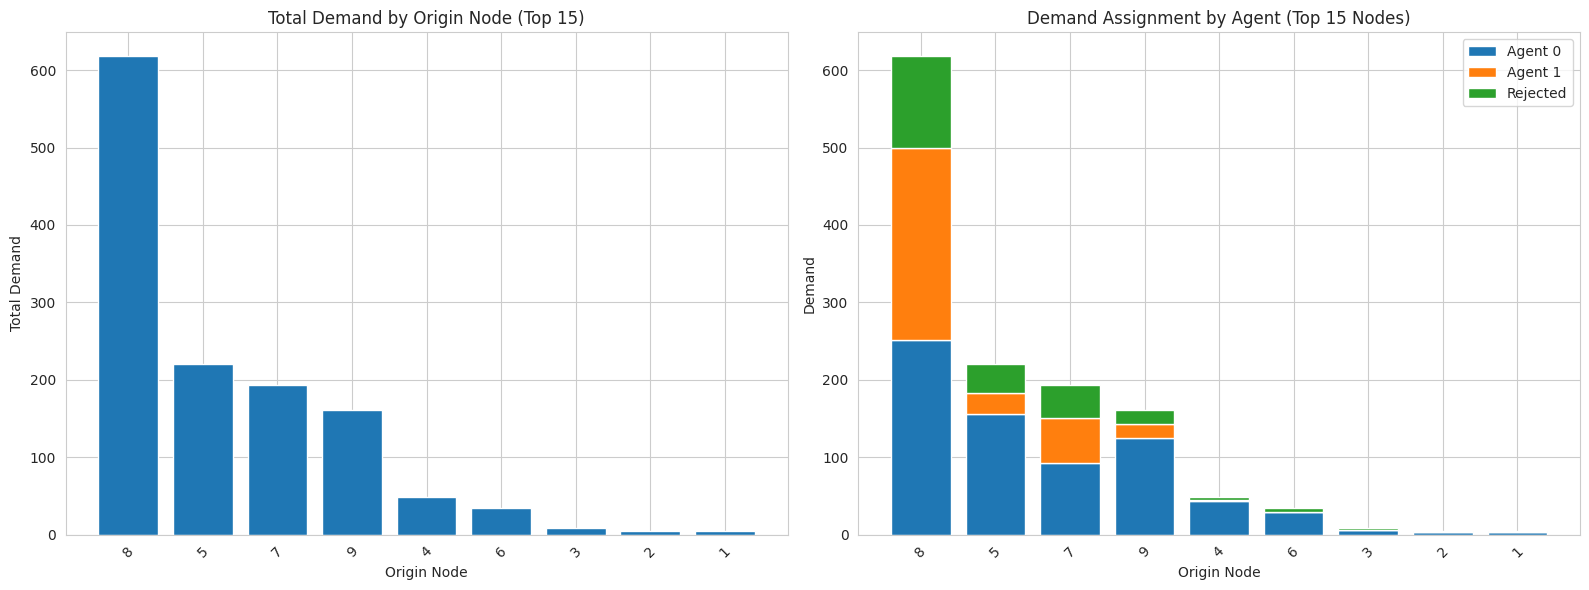

In [18]:
# Plot demand distribution by node
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Total demand by node
top_nodes = node_summary.head(15)  # Show top 15 nodes
ax1.bar(top_nodes['origin'].astype(str), top_nodes['total_demand'])
ax1.set_xlabel('Origin Node')
ax1.set_ylabel('Total Demand')
ax1.set_title('Total Demand by Origin Node (Top 15)')
ax1.tick_params(axis='x', rotation=45)

# Stacked bar chart showing agent assignment
ax2.bar(top_nodes['origin'].astype(str), top_nodes['demand_agent0'], label='Agent 0')
ax2.bar(top_nodes['origin'].astype(str), top_nodes['demand_agent1'], 
        bottom=top_nodes['demand_agent0'], label='Agent 1')
ax2.bar(top_nodes['origin'].astype(str), top_nodes['demand_rejected'], 
        bottom=top_nodes['demand_agent0'] + top_nodes['demand_agent1'], label='Rejected')
ax2.set_xlabel('Origin Node')
ax2.set_ylabel('Demand')
ax2.set_title('Demand Assignment by Agent (Top 15 Nodes)')
ax2.tick_params(axis='x', rotation=45)
ax2.legend()

plt.tight_layout()
plt.show()

## 7. Visualizations: Price and Utility Comparison

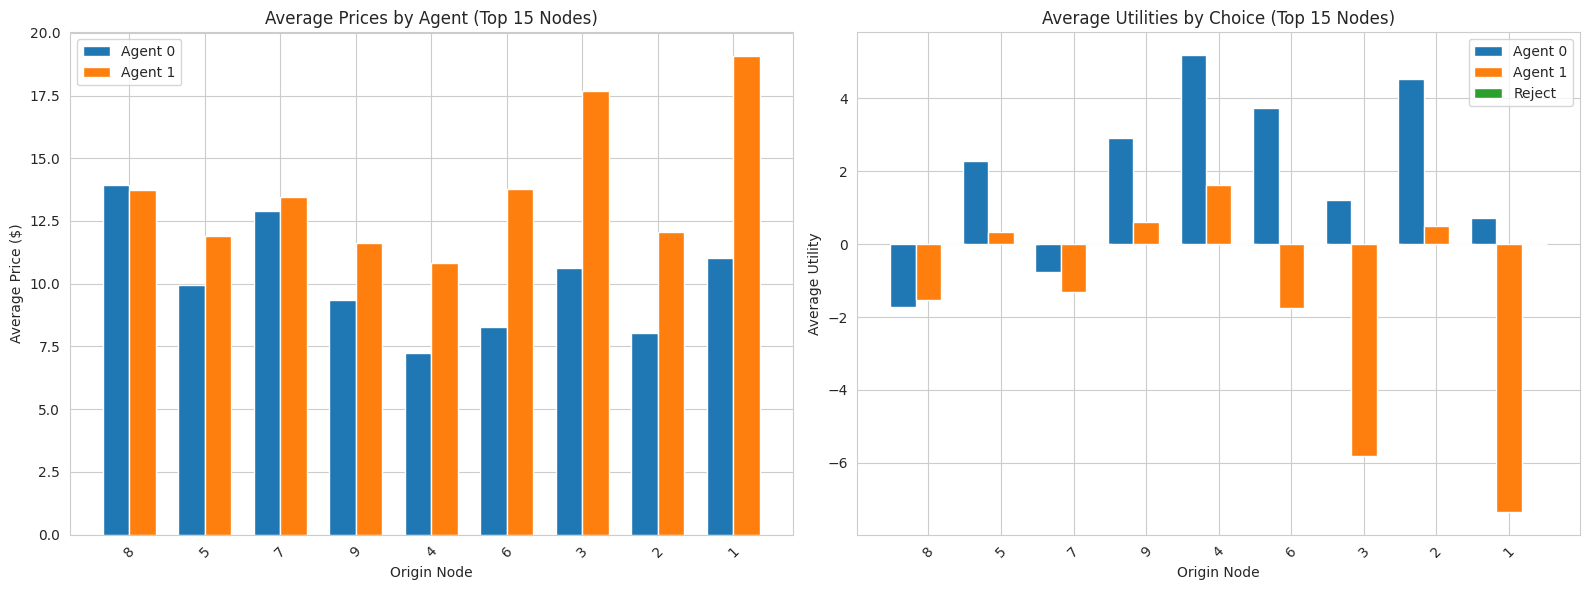

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Price comparison
x = np.arange(len(top_nodes))
width = 0.35
ax1.bar(x - width/2, top_nodes['price_agent0'], width, label='Agent 0')
ax1.bar(x + width/2, top_nodes['price_agent1'], width, label='Agent 1')
ax1.set_xlabel('Origin Node')
ax1.set_ylabel('Average Price ($)')
ax1.set_title('Average Prices by Agent (Top 15 Nodes)')
ax1.set_xticks(x)
ax1.set_xticklabels(top_nodes['origin'].astype(str), rotation=45)
ax1.legend()

# Utility comparison
ax2.bar(x - width, top_nodes['utility_agent0'], width, label='Agent 0')
ax2.bar(x, top_nodes['utility_agent1'], width, label='Agent 1')
ax2.bar(x + width, top_nodes['utility_reject'], width, label='Reject')
ax2.set_xlabel('Origin Node')
ax2.set_ylabel('Average Utility')
ax2.set_title('Average Utilities by Choice (Top 15 Nodes)')
ax2.set_xticks(x)
ax2.set_xticklabels(top_nodes['origin'].astype(str), rotation=45)
ax2.legend()

plt.tight_layout()
plt.show()

## 8. Visualizations: Choice Probabilities

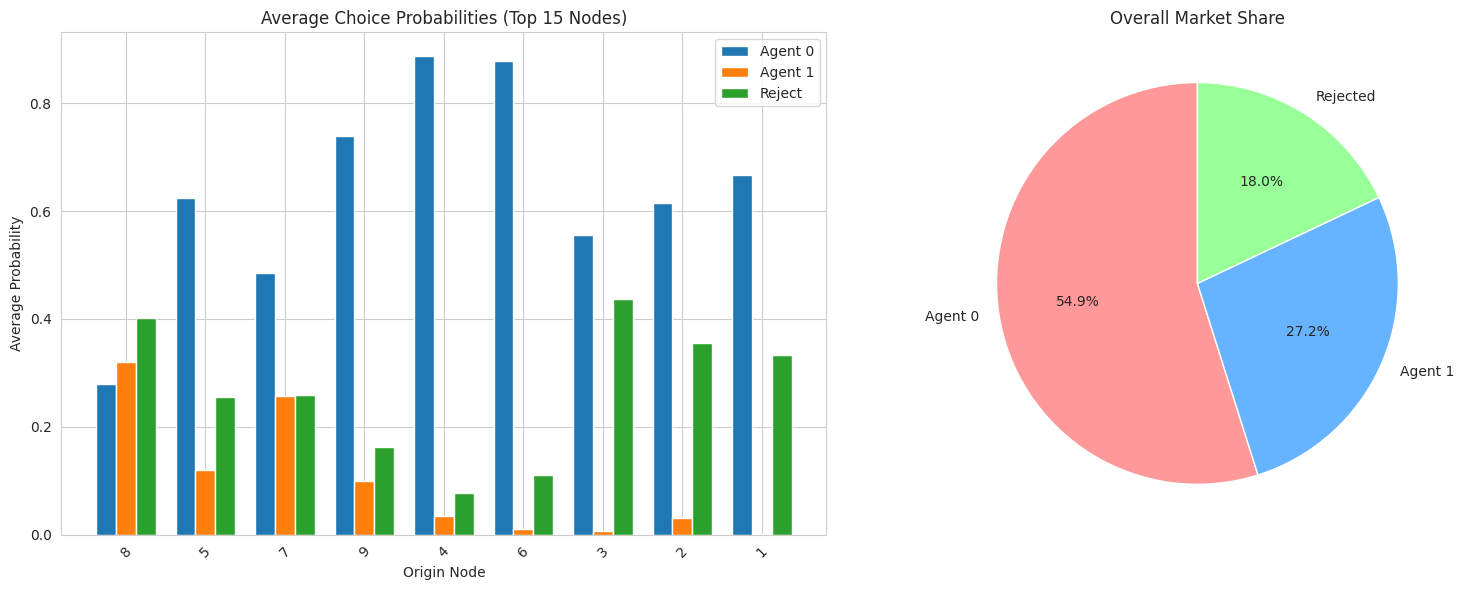

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Probability comparison
x = np.arange(len(top_nodes))
width = 0.25
ax1.bar(x - width, top_nodes['prob_agent0'], width, label='Agent 0')
ax1.bar(x, top_nodes['prob_agent1'], width, label='Agent 1')
ax1.bar(x + width, top_nodes['prob_reject'], width, label='Reject')
ax1.set_xlabel('Origin Node')
ax1.set_ylabel('Average Probability')
ax1.set_title('Average Choice Probabilities (Top 15 Nodes)')
ax1.set_xticks(x)
ax1.set_xticklabels(top_nodes['origin'].astype(str), rotation=45)
ax1.legend()

# Market share pie chart
total_shares = [total_served_agent0, total_served_agent1, total_rejected]
labels = ['Agent 0', 'Agent 1', 'Rejected']
colors = ['#ff9999', '#66b3ff', '#99ff99']
ax2.pie(total_shares, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('Overall Market Share')

plt.tight_layout()
plt.show()

## 9. Detailed Node Analysis

Select specific nodes for detailed analysis.


Analyzing top 3 nodes by demand: [8 5 7]

DETAILED ANALYSIS FOR NODE 8

Total demand: 618
  Agent 0 served: 252
  Agent 1 served: 247
  Rejected: 119

Average prices:
  Agent 0: $13.95 (std: $5.92)
  Agent 1: $13.75 (std: $5.67)

Average utilities:
  Agent 0: -1.73
  Agent 1: -1.53
  Reject: 0.00

Average choice probabilities:
  Agent 0: 0.279
  Agent 1: 0.319
  Reject: 0.402

Average travel time: 4.3 minutes
Number of O-D pairs: 99


/tmp/ipykernel_1092792/4152631290.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(prob_data, labels=['Agent 0', 'Agent 1', 'Reject'])


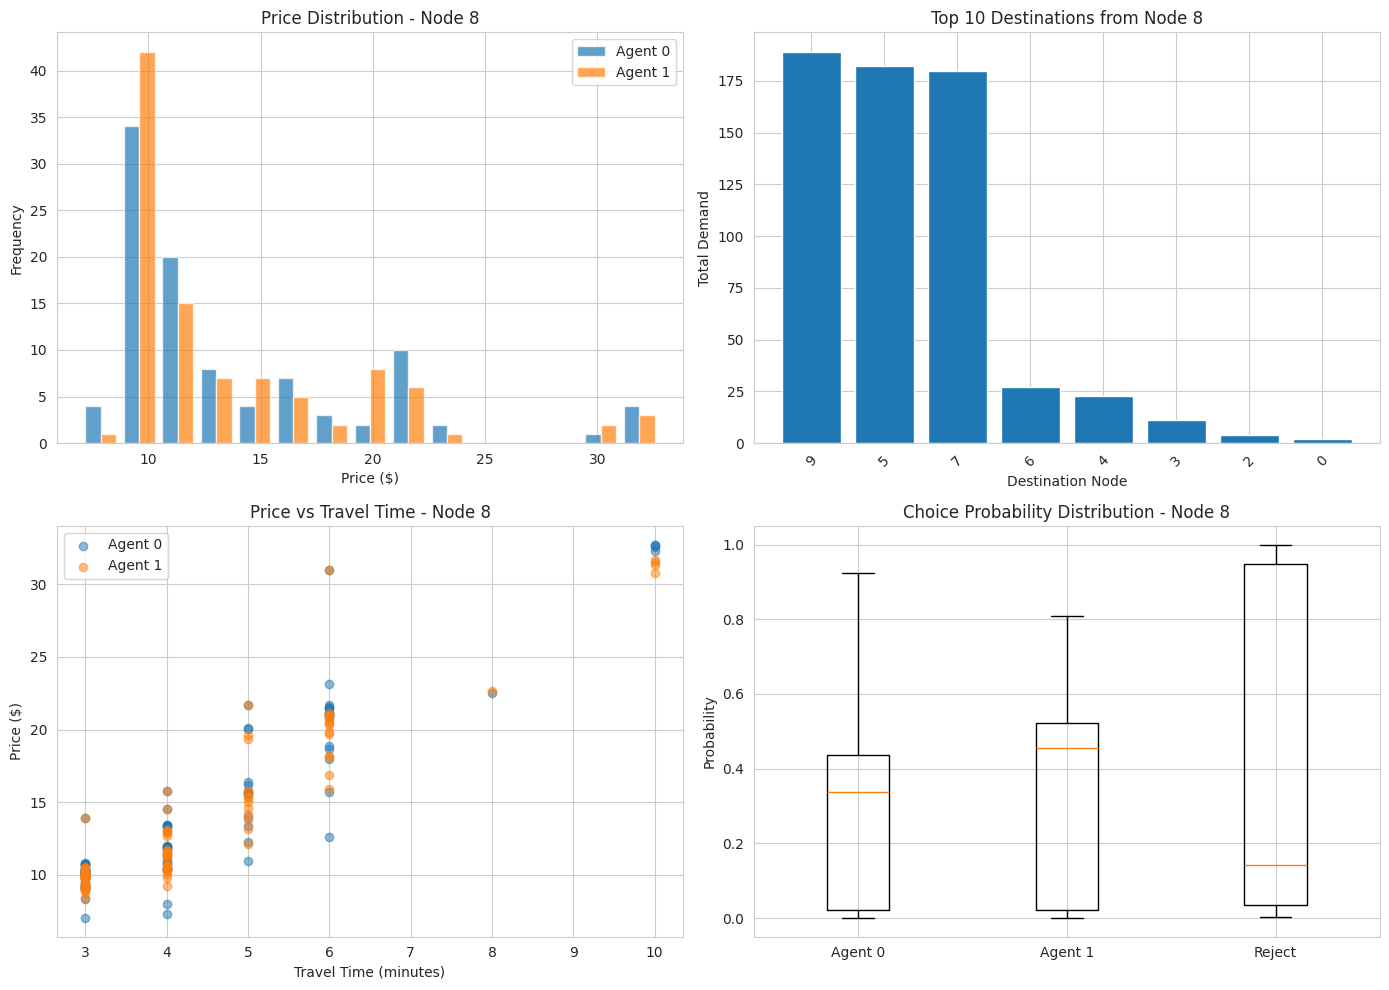

DETAILED ANALYSIS FOR NODE 5

Total demand: 220
  Agent 0 served: 156
  Agent 1 served: 27
  Rejected: 37

Average prices:
  Agent 0: $9.93 (std: $5.33)
  Agent 1: $11.89 (std: $5.51)

Average utilities:
  Agent 0: 2.28
  Agent 1: 0.32
  Reject: 0.00

Average choice probabilities:
  Agent 0: 0.624
  Agent 1: 0.120
  Reject: 0.256

Average travel time: 4.4 minutes
Number of O-D pairs: 56


/tmp/ipykernel_1092792/4152631290.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(prob_data, labels=['Agent 0', 'Agent 1', 'Reject'])


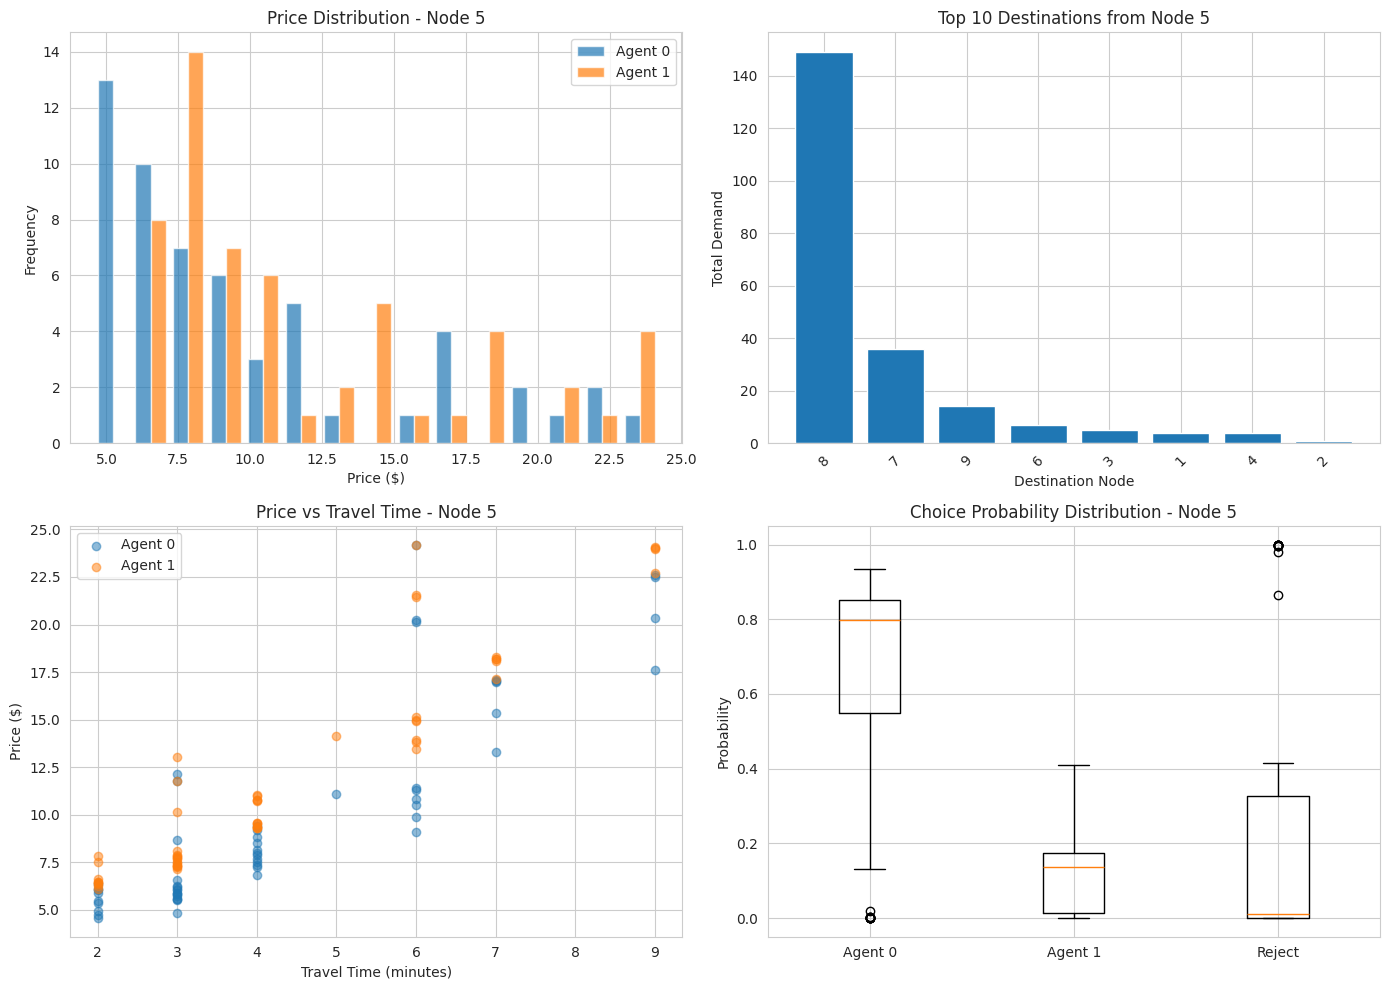

DETAILED ANALYSIS FOR NODE 7

Total demand: 193
  Agent 0 served: 92
  Agent 1 served: 58
  Rejected: 43

Average prices:
  Agent 0: $12.90 (std: $11.14)
  Agent 1: $13.47 (std: $10.58)

Average utilities:
  Agent 0: -0.76
  Agent 1: -1.33
  Reject: 0.00

Average choice probabilities:
  Agent 0: 0.484
  Agent 1: 0.257
  Reject: 0.258

Average travel time: 4.6 minutes
Number of O-D pairs: 72


/tmp/ipykernel_1092792/4152631290.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(prob_data, labels=['Agent 0', 'Agent 1', 'Reject'])


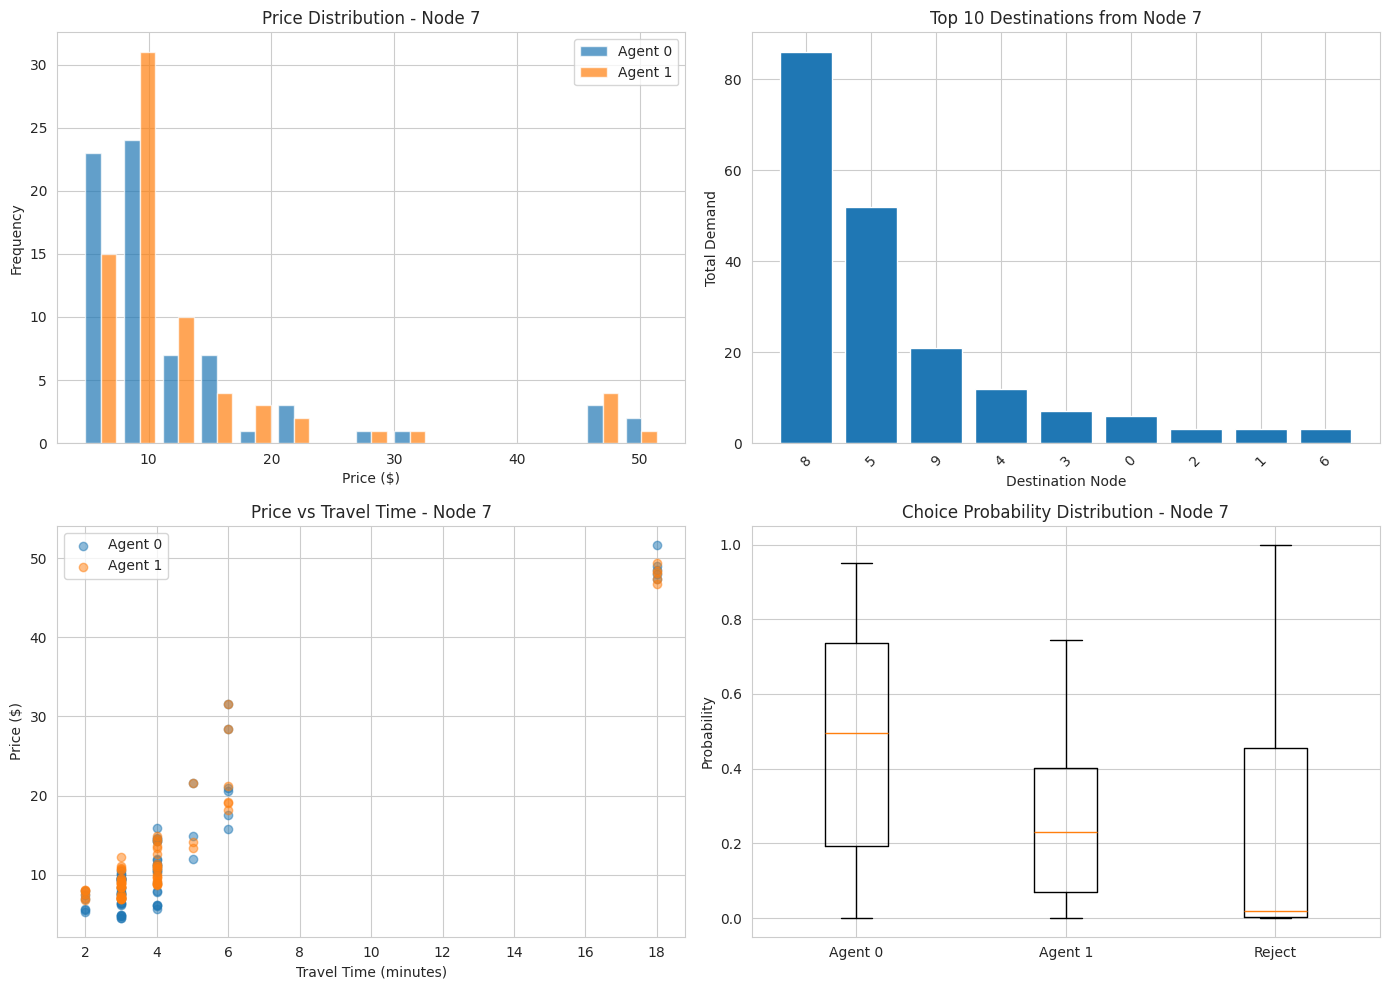

In [21]:
def analyze_node(node_id, df):
    """Analyze a specific node in detail"""
    node_data = df[df['origin'] == node_id]
    
    print("="*80)
    print(f"DETAILED ANALYSIS FOR NODE {node_id}")
    print("="*80)
    
    # Summary statistics
    print(f"\nTotal demand: {node_data['total_demand'].sum():.0f}")
    print(f"  Agent 0 served: {node_data['demand_agent0'].sum():.0f}")
    print(f"  Agent 1 served: {node_data['demand_agent1'].sum():.0f}")
    print(f"  Rejected: {node_data['demand_rejected'].sum():.0f}")
    
    print(f"\nAverage prices:")
    print(f"  Agent 0: ${node_data['price_agent0'].mean():.2f} (std: ${node_data['price_agent0'].std():.2f})")
    print(f"  Agent 1: ${node_data['price_agent1'].mean():.2f} (std: ${node_data['price_agent1'].std():.2f})")
    
    print(f"\nAverage utilities:")
    print(f"  Agent 0: {node_data['utility_agent0'].mean():.2f}")
    print(f"  Agent 1: {node_data['utility_agent1'].mean():.2f}")
    print(f"  Reject: {node_data['utility_reject'].mean():.2f}")
    
    print(f"\nAverage choice probabilities:")
    print(f"  Agent 0: {node_data['prob_agent0'].mean():.3f}")
    print(f"  Agent 1: {node_data['prob_agent1'].mean():.3f}")
    print(f"  Reject: {node_data['prob_reject'].mean():.3f}")
    
    print(f"\nAverage travel time: {node_data['travel_time'].mean():.1f} minutes")
    print(f"Number of O-D pairs: {len(node_data)}")
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Price distribution
    axes[0, 0].hist([node_data['price_agent0'], node_data['price_agent1']], 
                     label=['Agent 0', 'Agent 1'], bins=15, alpha=0.7)
    axes[0, 0].set_xlabel('Price ($)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title(f'Price Distribution - Node {node_id}')
    axes[0, 0].legend()
    
    # Demand by destination
    dest_demand = node_data.groupby('destination')['total_demand'].sum().sort_values(ascending=False).head(10)
    axes[0, 1].bar(dest_demand.index.astype(str), dest_demand.values)
    axes[0, 1].set_xlabel('Destination Node')
    axes[0, 1].set_ylabel('Total Demand')
    axes[0, 1].set_title(f'Top 10 Destinations from Node {node_id}')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Price vs Travel Time scatter
    axes[1, 0].scatter(node_data['travel_time'], node_data['price_agent0'], 
                       alpha=0.5, label='Agent 0')
    axes[1, 0].scatter(node_data['travel_time'], node_data['price_agent1'], 
                       alpha=0.5, label='Agent 1')
    axes[1, 0].set_xlabel('Travel Time (minutes)')
    axes[1, 0].set_ylabel('Price ($)')
    axes[1, 0].set_title(f'Price vs Travel Time - Node {node_id}')
    axes[1, 0].legend()
    
    # Choice probability distribution
    prob_data = [node_data['prob_agent0'].values, 
                 node_data['prob_agent1'].values, 
                 node_data['prob_reject'].values]
    axes[1, 1].boxplot(prob_data, labels=['Agent 0', 'Agent 1', 'Reject'])
    axes[1, 1].set_ylabel('Probability')
    axes[1, 1].set_title(f'Choice Probability Distribution - Node {node_id}')
    
    plt.tight_layout()
    plt.show()

# Analyze the top 3 nodes by demand
top_3_nodes = node_summary.head(3)['origin'].values
print(f"\nAnalyzing top 3 nodes by demand: {top_3_nodes}\n")

for node in top_3_nodes:
    analyze_node(node, df)

## 10. Correlation Analysis

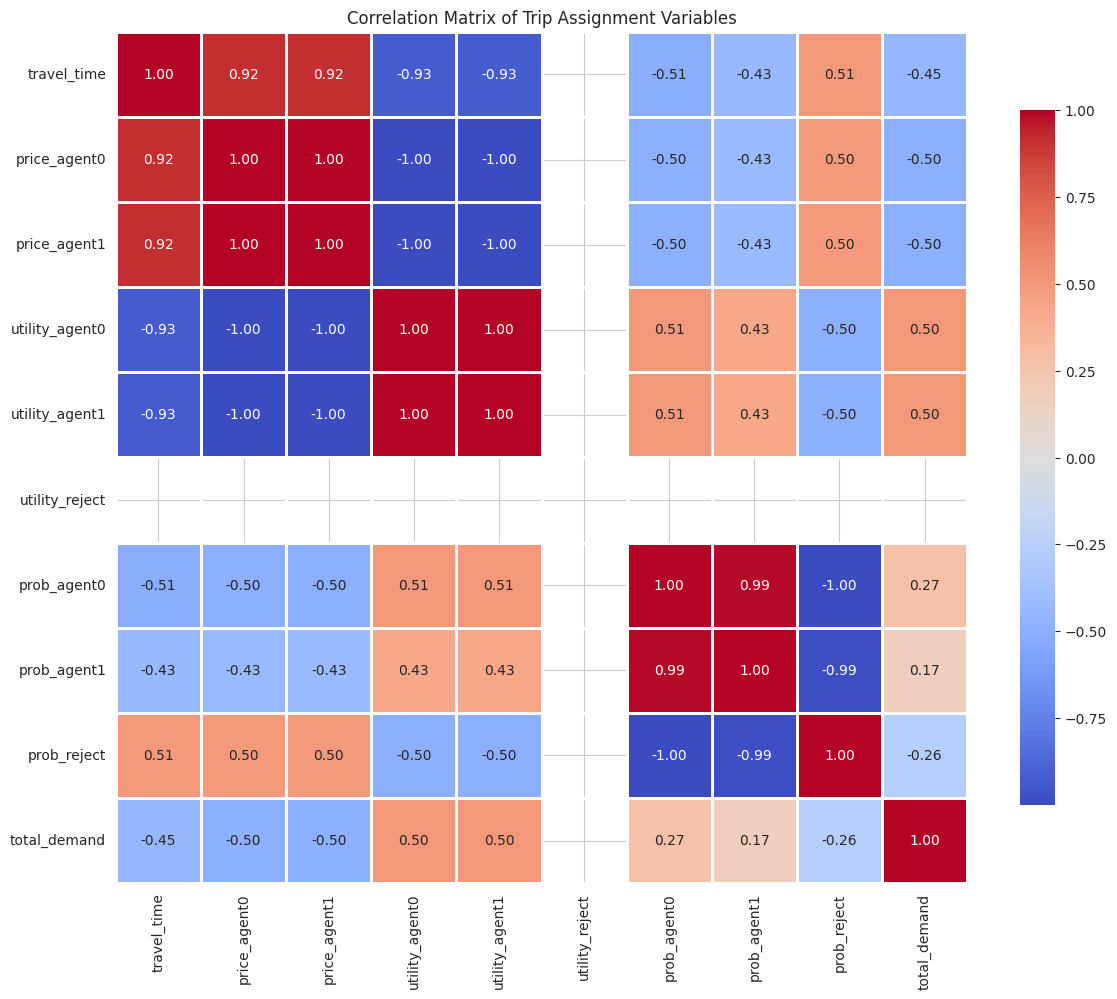


Key Correlations:
Price Agent 0 vs Utility Agent 0: -1.000
Price Agent 1 vs Utility Agent 1: -1.000
Utility Agent 0 vs Prob Agent 0: 0.507
Utility Agent 1 vs Prob Agent 1: 0.428
Travel Time vs Price Agent 0: 0.919
Travel Time vs Price Agent 1: 0.919


In [10]:
# Select numerical columns for correlation
corr_columns = ['travel_time', 'price_agent0', 'price_agent1', 
                'utility_agent0', 'utility_agent1', 'utility_reject',
                'prob_agent0', 'prob_agent1', 'prob_reject',
                'total_demand']

# Calculate correlation matrix
corr_matrix = df[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Trip Assignment Variables')
plt.tight_layout()
plt.show()

# Key insights
print("\nKey Correlations:")
print(f"Price Agent 0 vs Utility Agent 0: {corr_matrix.loc['price_agent0', 'utility_agent0']:.3f}")
print(f"Price Agent 1 vs Utility Agent 1: {corr_matrix.loc['price_agent1', 'utility_agent1']:.3f}")
print(f"Utility Agent 0 vs Prob Agent 0: {corr_matrix.loc['utility_agent0', 'prob_agent0']:.3f}")
print(f"Utility Agent 1 vs Prob Agent 1: {corr_matrix.loc['utility_agent1', 'prob_agent1']:.3f}")
print(f"Travel Time vs Price Agent 0: {corr_matrix.loc['travel_time', 'price_agent0']:.3f}")
print(f"Travel Time vs Price Agent 1: {corr_matrix.loc['travel_time', 'price_agent1']:.3f}")

## 11. Summary Report

In [11]:
# Generate comprehensive summary
print("="*80)
print("TRIP ASSIGNMENT ANALYSIS SUMMARY")
print("="*80)

print(f"\nDataset Information:")
print(f"  City: {city}")
print(f"  Mode: {mode}")
print(f"  Fixed Agent: {fix_agent}")
print(f"  Total trip records: {len(df)}")
print(f"  Number of origin nodes: {df['origin'].nunique()}")
print(f"  Number of destination nodes: {df['destination'].nunique()}")
print(f"  Time steps covered: {df['time'].min()} to {df['time'].max()}")

print(f"\nDemand Summary:")
print(f"  Total demand: {total_demand:.0f}")
print(f"  Agent 0 market share: {total_served_agent0/total_demand*100:.1f}%")
print(f"  Agent 1 market share: {total_served_agent1/total_demand*100:.1f}%")
print(f"  Rejection rate: {total_rejected/total_demand*100:.1f}%")

print(f"\nPrice Summary:")
print(f"  Agent 0 - Mean: ${df['price_agent0'].mean():.2f}, Std: ${df['price_agent0'].std():.2f}")
print(f"  Agent 1 - Mean: ${df['price_agent1'].mean():.2f}, Std: ${df['price_agent1'].std():.2f}")
print(f"  Average price difference: ${df['price_agent0'].mean() - df['price_agent1'].mean():.2f}")

print(f"\nUtility Summary:")
print(f"  Agent 0 - Mean: {df['utility_agent0'].mean():.2f}")
print(f"  Agent 1 - Mean: {df['utility_agent1'].mean():.2f}")
print(f"  Reject - Mean: {df['utility_reject'].mean():.2f}")

print(f"\nChoice Probability Summary:")
print(f"  Agent 0 - Mean: {df['prob_agent0'].mean():.3f}")
print(f"  Agent 1 - Mean: {df['prob_agent1'].mean():.3f}")
print(f"  Reject - Mean: {df['prob_reject'].mean():.3f}")

print(f"\nTravel Time Summary:")
print(f"  Mean: {df['travel_time'].mean():.1f} minutes")
print(f"  Std: {df['travel_time'].std():.1f} minutes")
print(f"  Min: {df['travel_time'].min():.1f} minutes")
print(f"  Max: {df['travel_time'].max():.1f} minutes")

print(f"\nTop 5 Nodes by Demand:")
for idx, row in node_summary.head(5).iterrows():
    print(f"  Node {int(row['origin'])}: {row['total_demand']:.0f} trips "
          f"(Agent 0: {row['agent0_share']*100:.1f}%, "
          f"Agent 1: {row['agent1_share']*100:.1f}%, "
          f"Rejected: {row['rejection_rate']*100:.1f}%)")

print("\n" + "="*80)
print("Analysis complete!")

TRIP ASSIGNMENT ANALYSIS SUMMARY

Dataset Information:
  City: san_francisco
  Mode: 1
  Fixed Agent: 2
  Total trip records: 86
  Number of origin nodes: 8
  Number of destination nodes: 10
  Time steps covered: 0 to 4

Demand Summary:
  Total demand: 308
  Agent 0 market share: 12.3%
  Agent 1 market share: 0.3%
  Rejection rate: 87.3%

Price Summary:
  Agent 0 - Mean: $20.27, Std: $7.24
  Agent 1 - Mean: $24.32, Std: $8.69
  Average price difference: $-4.05

Utility Summary:
  Agent 0 - Mean: -8.13
  Agent 1 - Mean: -12.18
  Reject - Mean: 0.00

Choice Probability Summary:
  Agent 0 - Mean: 0.080
  Agent 1 - Mean: 0.006
  Reject - Mean: 0.914

Travel Time Summary:
  Mean: 4.6 minutes
  Std: 1.4 minutes
  Min: 3.0 minutes
  Max: 9.0 minutes

Top 5 Nodes by Demand:
  Node 8: 162 trips (Agent 0: 13.0%, Agent 1: 0.0%, Rejected: 87.0%)
  Node 7: 50 trips (Agent 0: 8.0%, Agent 1: 0.0%, Rejected: 92.0%)
  Node 5: 39 trips (Agent 0: 23.1%, Agent 1: 2.6%, Rejected: 74.4%)
  Node 9: 33 trips 